In [2]:
import numpy as np
import os
import matplotlib.pyplot as pl
from tqdm import tqdm

from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import imageio.v3 as imageio

In [3]:
ROOT_PREFIX = "data_venus/arecibo_radar/pds-geosciences.wustl.edu/venus/arcb_nrao-v-rtls_gbt-3-delaydoppler-v1/vrm_90xx/"
#IMAGE_PREFIX = ROOT_PREFIX + "OCP_GLOBAL_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "SUPERRESOLUTION_ROT_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "SUPERRESOLUTION_4STACK_ROT_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "SUPERRESOLUTION_MARGOT_ROT_TRIAGE/"
IMAGE_PREFIX = ROOT_PREFIX + "PARAM_ROT_4STACK_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "PARAM_RA_DEC_4STACK_TRIAGE/"

In [34]:
filenames = os.listdir(IMAGE_PREFIX)
filenames.sort()

YEAR1 = '1988'
YEAR2 = '2017'

FILENAMES1 = []
FILENAMES2 = []
ROT = []
RA = []
DEC = []

for filename in filenames:
    if not 'rot' in filename: continue

    rot = float(filename[(filename.find("rot_") + 4):].split(' ')[0])
#    ra = float(filename[(filename.find("ra_") + 3):].split('_')[0])
#    dec = float(filename[(filename.find("dec_") + 4):].split('_')[0])

#    if abs(rot - -243.0206) > 0.0001: continue
#    if ra != 272.76: continue
#    if dec != 67.16: continue
#    if ra < 272.72: continue
#    if dec < 67.15: continue
#    if ra < 272.72: continue
#    if dec > 67.18: continue

    if f'venus_ocp_{YEAR1}' in filename: 
        FILENAMES1.append(filename)
        # Only add the parameters once!
        ROT.append(rot)
#        RA.append(ra)
#        DEC.append(dec)
    if f'venus_ocp_{YEAR2}' in filename: 
        FILENAMES2.append(filename)

if 0: # debug
    print(len(FILENAMES1))
    #pl.plot(ROT)
    pl.figure()
    pl.scatter(RA, DEC)

if 1: # Preload images (slow!)
    IMAGES1 = []
    IMAGES2 = []
    for i in tqdm(range(len(FILENAMES2))):
        # Drop the bottom half of the images to save RAM, since we're looking at the northern hemisphere.
        IMAGES1.append(imageio.imread(IMAGE_PREFIX + FILENAMES1[i])[:8000].copy())
        IMAGES2.append(imageio.imread(IMAGE_PREFIX + FILENAMES2[i])[:8000].copy())

100%|███████████████████████████████████████████████████████████| 46/46 [02:52<00:00,  3.75s/it]


In [8]:
if 0:  # debug visualization
    pl.figure(figsize=(20, 20))
    pl.imshow(i2017[0])
    pl.grid()

In [28]:
# Specify a patch, or region of interest
if 0:
    patch_name = "big vertical slice"
    w = 2000
    h = 5000
    rc = 5000
    cc = 8000
    rs = rc - h // 2
    re = rs + h
    cs = cc - w // 2
    ce = cs + w
    dr = 0
    dc = 0

if 1:
    patch_name = "big horizontal slice"
    w = 10000
    h = 1000
    rc = 6000
    cc = 6000
    rs = rc - h // 2
    re = rs + h
    cs = cc - w // 2
    ce = cs + w
    dr = 0
    dc = 0

if 0: # "Gula Mons"
    patch_name = "Gula Mons"
    w = 500
    h = 500
    rc = 6000
    cc = 7900
    rs = rc - h // 2
    re = rs + h
    cs = cc - w // 2
    ce = cs + w
    dr = -4
    dc = 0

if 0: # Ariadne crater
    patch_name = "Ariadne crater"
    w = 150 #200
    h = 150
    rc = 5379
    cc = 8050
    rs = rc - h // 2
    re = rs + h
    cs = cc - w // 2
    ce = cs + w
#    dr = -2
    dr = 0
    dc = 0

if 0: # Lenore crater
    patch_name = "Lenore crater"
    w = 100 
    h = 100
    rc = 4490
    cc = 2480
    rs = rc - h // 2
    re = rs + h
    cs = cc - w // 2
    ce = cs + w
    dr = 0
    dc = 0
    
if 0: # "??? crater"
    w = 100 
    h = 100
    rc = 4490
    cc = 2480
    rs = rc - h // 2
    re = rs + h
    cs = cc - w // 2
    ce = cs + w
    dr = 0
    dc = 0

if 0:  # debug visualization
    patch1 = IMAGES1[0][rs:re, cs:ce]
    patch2 = IMAGES2[0][(rs + dr):(re + dr), (cs + dc):(ce + dc)]

    pl.figure(figsize=(12,4))
    pl.subplot(2, 2, 1)
    pl.imshow(patch1)
    pl.title(f"original {patch_name}")
    pl.subplot(2, 2, 3)
    pl.plot(np.sum(patch1, axis=0))
    pl.title("intensity per column")
    pl.gca().get_yaxis().set_visible(False)
    pl.subplot(2, 2, 2)
    patch1 = patch1 / np.sum(patch1, axis=0)
    pl.imshow(patch1)
    pl.title(f"column-normalized {patch_name}")
    pl.subplot(2, 2, 4)
    pl.plot(np.sum(patch1, axis=0))
    pl.title("intensity per column")
    pl.gca().get_yaxis().set_visible(False)
    
    ## Normalize the intensity in each column to avoid large gradients
    #patch1 = patch1 / np.sum(patch1, axis=0)
    #patch2 = patch2 / np.sum(patch2, axis=0)
    #pl.figure()
    #pl.imshow(patch1)
    #pl.grid()
    #pl.figure()
    #pl.imshow(patch2)
    #pl.grid()

In [23]:
if 0:  # Visualization, and play around with misalignment
    #for i in range(99):
    #for i in (53,):
    for i in (0,):
        #i = 100
        #for dr in range(-10, 10):
        #        i = 52
        filename = FILENAMES1[i]
        substring_i = filename.find("rot_") + 4
        rot = float(filename[substring_i:].split(' ')[0])
        print(f"{rot=}")
        #    image1 = imageio.imread(IMAGE_PREFIX + f1998[i])
        #    image2 = imageio.imread(IMAGE_PREFIX + f2017[i])
        image1 = IMAGES1[i]
        image2 = IMAGES2[i]

        if 1:
            print(f"{dr=}")
            patch1 = image1[rs:re, cs:ce]
            patch2 = image2[(rs + dr):(re + dr), (cs + dc):(ce + dc)]

            if 0:
                SCALE = 8
                HEIGHT = patch1.shape[0] // SCALE
                WIDTH = patch1.shape[1] // SCALE
                patch1 = patch1.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
                patch1 = patch1.mean((1, 3))
                patch2 = patch2.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
                patch2 = patch2.mean((1, 3))

            if 1:
                SIZE = 4
                x, y = np.mgrid[-SIZE:SIZE+1, -SIZE:SIZE+1]
                g = np.exp(-(x**2 + y**2) / SIZE)
                patch1 = scipy.signal.convolve(patch1, g, mode='valid')
                patch2 = scipy.signal.convolve(patch2, g, mode='valid')

            patch1 -= patch1.min()
            patch1 /= patch1.max()

            patch2 -= patch2.min()
            patch2 /= patch2.max()

            if 1:
                pl.clf()
                pl.figure(figsize=(8, 8))
                pl.subplot(2, 2, 1)
                pl.imshow(patch1)
                pl.grid()
                pl.title('Blurred Image 1')
                pl.subplot(2, 2, 3)
                pl.imshow(patch2)
                pl.grid()
                pl.title('Blurred Image 2')
                pl.subplot(2, 2, 2)
                pl.imshow(patch1 + patch2)
                pl.grid()
                pl.title('Blurred Image 1 + Blurred Image 2')
                pl.subplot(2, 2, 4)
                pl.imshow(patch1 * patch2)
                pl.grid()
                pl.title('Blurred Image 1 * Blurred Image 2')
                #pl.savefig(f"rotation_period_ariadne/rotation_period_ariadne_rot_{rot:0.5f}_dr_{dr}.png")

            score = np.sum(patch1 * patch2)
            print(f"{score=}")

In [35]:
import scipy

SCORE = []

for i in tqdm(range(len(FILENAMES2))):

    patch1 = IMAGES1[i][rs:re, cs:ce]
    patch2 = IMAGES2[i][(rs + dr):(re + dr), (cs + dc):(ce + dc)]

    # Normalize the intensity in each column to avoid bias from horizontal gradients
    patch1 = patch1 / np.sum(patch1, axis=0)
    patch2 = patch2 / np.sum(patch2, axis=0)
#
#    # Try the same thing for the rows
#    patch1 = (patch1.T / np.sum(patch1, axis=1)).T
#    patch2 = (patch2.T / np.sum(patch2, axis=1)).T

    if 0:  # debug
        pl.figure()
        pl.imshow(patch1)
        pl.figure()
        pl.imshow(patch2)

    if 0:  # Downscale with SCALE x SCALE averaging.
        #SCALE = 16
        SCALE = 5
        HEIGHT = patch1.shape[0] // SCALE
        WIDTH = patch1.shape[1] // SCALE
        patch1 = patch1.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
        patch1 = patch1.mean((1, 3))
        patch2 = patch2.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
        patch2 = patch2.mean((1, 3))
    if 1:  # Blur horizontally
        SIZE = 32
        x, y = np.mgrid[-SIZE:SIZE+1, -SIZE:SIZE+1]
        g = np.exp(-(x**2 + y**2) / SIZE)
        patch1 = scipy.signal.convolve(patch1, g, mode='valid')
        patch2 = scipy.signal.convolve(patch2, g, mode='valid')
    if 1:  # Blur vertically
        SIZE = 32
        x, y = np.mgrid[-SIZE:SIZE+1, -SIZE:SIZE+1]
        g = np.exp(-(x**2 + y**2) / SIZE)
        patch1 = scipy.signal.convolve(patch1.T, g, mode='valid').T
        patch2 = scipy.signal.convolve(patch2.T, g, mode='valid').T

    if 0:  # debug
        pl.figure()
        pl.imshow(patch1)
        pl.figure()
        pl.imshow(patch2)
        break

    score = np.sum(patch1 * patch2)
    SCORE.append(score)

100%|███████████████████████████████████████████████████████████| 46/46 [02:11<00:00,  2.86s/it]


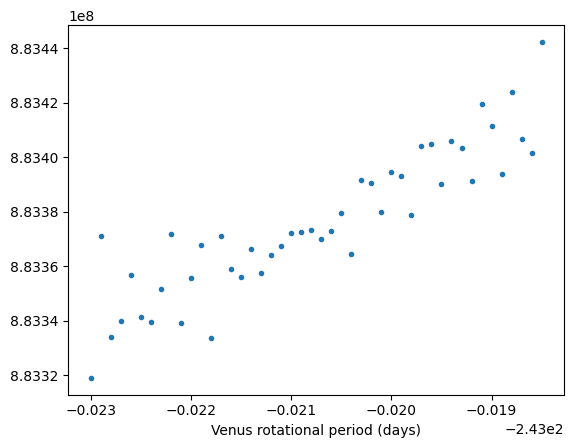

In [36]:
#%matplotlib widget

ROTa = np.array(ROT)
RAa = np.array(RA)
DECa = np.array(DEC)
SCOREa = np.array(SCORE)

#IPSa -= IPSa.min()
#IPSa /= IPSa.max()

if 1:
    pl.plot(ROTa, SCOREa, '.')
    pl.xlabel("Venus rotational period (days)")

#pl.plot(RAa, SCOREa, '.')
#pl.xlabel("Venus North Pole right ascension (degrees)")

#pl.plot(DECa, SCOREa, '.')
#pl.xlabel("Venus North Pole declination (degrees)")

#RAa = RAa.reshape((11, 11))
#DECa = DECa.reshape((11, 11))
#SCOREa = SCOREa.reshape((11, 11))

if 0:
    fig = pl.figure()
    ax = fig.add_subplot()
    #ax = fig.add_subplot(projection='3d')
    #ax.scatter(RAa, DECa, SCOREa, c=SCOREa, cmap='jet')
    sc = ax.scatter(RAa, DECa, c=SCOREa, cmap='jet')
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
    #ax.set_zlabel('Correlation (raw)')
    #ax.plot_surface(RAa, DECa, SCOREa, cmap=cm.coolwarm)
    
    #pl.title(f"1988 to 2017 single-observation correlation of {patch_name}")
    pl.title(f"{YEAR1} to {YEAR2} stack-of-4 correlation of {patch_name}")
    #pl.grid()
    #pl.show()
    
    pl.colorbar(sc)



## Curve smoothing/fits

In [37]:
# Normalize parameters for curve fitting/smoothing
x = ROTa.copy()
y = SCOREa.copy()

x_min = x.min()
x -= x_min
x_max = x.max()
x /= x_max

y_min = y.min()
y -= y_min
y_max = y.max()
y /= y_max

max_i=0
smoothed max rot=-243.0185


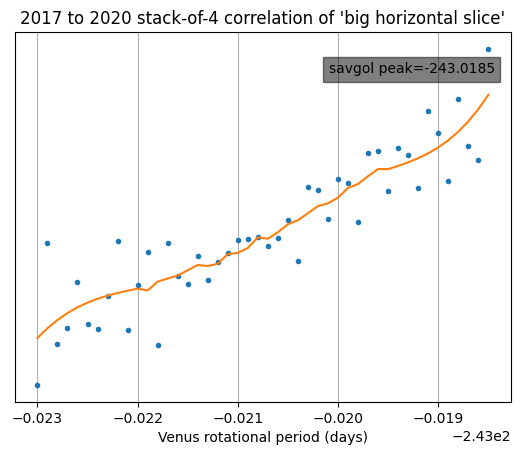

In [38]:
if 1:  # Smooth with SavGol filter
    from scipy.signal import savgol_filter
    
    yhat = savgol_filter(y, 21, 3)
    #yhat = savgol_filter(y, 5, 3)
    
    #pl.plot(x, y, '.')
    #pl.plot(x, yhat, '.')
    
    pl.plot(ROTa, SCOREa, '.')
    pl.plot(x * x_max + x_min, yhat * y_max + y_min, '-')
    #pl.plot(x * x_max + x_min, yhat, '-')
    #pl.title(f"1988 to 2017 single-observation correlation of '{patch_name}'")
    pl.title(f"{YEAR1} to {YEAR2} stack-of-4 correlation of '{patch_name}'")
    pl.xlabel("Venus rotational period (days)")
    pl.grid()
    
    max_i = np.argmax(yhat)
    print(f"{max_i=}")
    print(f"smoothed max rot={ROT[max_i]}")
    
    pl.text(0.8, 0.9, f"savgol peak={ROT[max_i]}", horizontalalignment='center',
           verticalalignment='center', transform=pl.gca().transAxes, bbox=dict(facecolor='black', alpha=0.5))
    pl.gca().get_yaxis().set_visible(False)

In [ ]:
if 0:  # Fit a gaussian
    from scipy.optimize import curve_fit
    n = len(x)
    mean = sum(x * y) / n
    sigma = sum(y * (x - mean)**2) / n
    
    def gaus(x, a, x0, sigma):
        return a *np.exp(-(x-x0)**2 / (2*sigma**2))
    
    popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
    
    pl.plot(x, y, '.')
    pl.plot(x, gaus(x, *popt), '.')